In [1]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([["lawaful gowod", "neuwutrul gowod", "chaowotic gowod"],
             ["lawafuwul nuwutrul", "twuwue nuwutrul", "chaowotic nuwutrul"],
             ["lawafuwul evil", "neuwutrul evil", "chaowotic evil"]])

In [4]:
path = "/Users/t-luczha/Downloads/mts.csv"

In [5]:
df=pd.read_csv(path).drop(columns=["Timestamp"])
df=shuffle(df)
df = df.reset_index()
for col in df.columns:
    column = col[18:-1]
    df[column] = df[col]
    df = df.drop(columns=[col])

In [6]:
df

,,ewic,mwakenwa,kwan,swanid,showon,arjuwun,wachie,luwucy,dewwick
0,5,chaowotic gowod,neuwutrul gowod,twuwue nuwutrul,lawafuwul evil,neuwutrul evil,lawafuwul nuwutrul,chaowotic nuwutrul,chaowotic evil,lawaful gowod
1,6,chaowotic nuwutrul,neuwutrul gowod,chaowotic gowod,lawafuwul evil,neuwutrul evil,lawafuwul nuwutrul,twuwue nuwutrul,chaowotic evil,lawaful gowod
2,7,lawafuwul nuwutrul,lawaful gowod,twuwue nuwutrul,chaowotic evil,chaowotic nuwutrul,neuwutrul evil,chaowotic gowod,neuwutrul gowod,lawafuwul evil
3,1,chaowotic evil,twuwue nuwutrul,lawafuwul evil,neuwutrul gowod,lawafuwul nuwutrul,neuwutrul evil,chaowotic nuwutrul,chaowotic gowod,lawaful gowod
4,2,lawafuwul evil,neuwutrul gowod,lawaful gowod,twuwue nuwutrul,chaowotic gowod,chaowotic nuwutrul,chaowotic evil,neuwutrul evil,lawafuwul nuwutrul
5,4,lawafuwul nuwutrul,chaowotic gowod,neuwutrul evil,twuwue nuwutrul,chaowotic nuwutrul,neuwutrul gowod,chaowotic evil,lawafuwul evil,lawaful gowod
6,3,chaowotic evil,neuwutrul evil,lawafuwul evil,twuwue nuwutrul,chaowotic nuwutrul,lawafuwul nuwutrul,chaowotic gowod,neuwutrul gowod,lawaful gowod
7,0,neuwutrul evil,lawafuwul nuwutrul,chaowotic evil,neuwutrul gowod,lawafuwul evil,twuwue nuwutrul,chaowotic gowod,chaowotic nuwutrul,lawaful gowod


In [7]:
def get_indices(string):
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i,j] == string:
                return i,j
    return -1

def get_matrix(string_list):
    a = np.zeros((3,3))
    for string in string_list:
        indices = get_indices(string)
        a[indices] += 1
    return a

In [8]:
mats = {}
for col in df.columns:
    matrix = get_matrix(list(df[col]))
    mats[col] = matrix
    print(col)
    print(matrix)



[[0. 0. 0.]
 [0. 0. 0.]
 [8. 8. 8.]]
ewic
[[0. 0. 1.]
 [2. 0. 1.]
 [1. 1. 2.]]
mwakenwa
[[1. 3. 1.]
 [1. 1. 0.]
 [0. 1. 0.]]
kwan
[[1. 0. 1.]
 [0. 2. 0.]
 [2. 1. 1.]]
swanid
[[0. 2. 0.]
 [0. 3. 0.]
 [2. 0. 1.]]
showon
[[0. 0. 1.]
 [1. 0. 3.]
 [1. 2. 0.]]
arjuwun
[[0. 1. 0.]
 [3. 1. 1.]
 [0. 2. 0.]]
wachie
[[0. 0. 3.]
 [0. 1. 2.]
 [0. 0. 2.]]
luwucy
[[0. 2. 1.]
 [0. 0. 1.]
 [1. 1. 2.]]
dewwick
[[6. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


[['lawaful gowod' 'neuwutrul gowod' 'chaowotic gowod']
 ['lawafuwul nuwutrul' 'twuwue nuwutrul' 'chaowotic nuwutrul']
 ['lawafuwul evil' 'neuwutrul evil' 'chaowotic evil']]


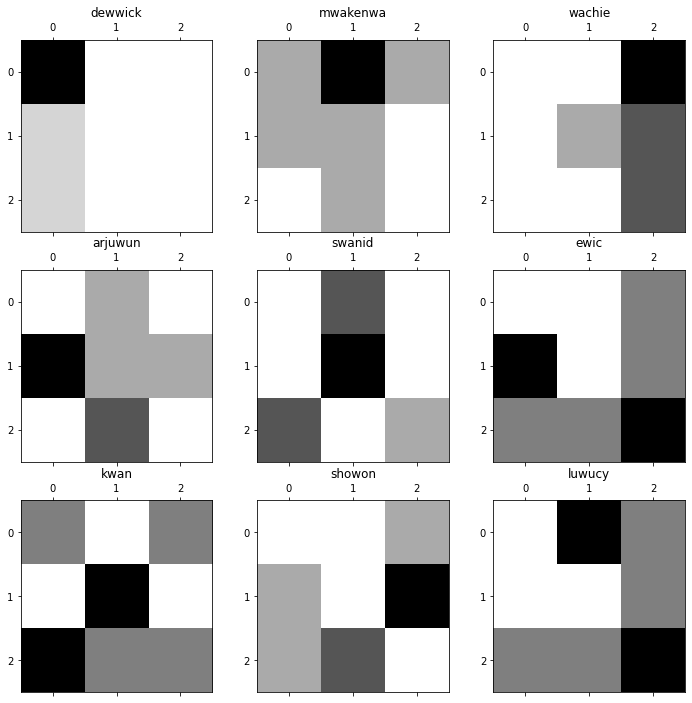

In [9]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
p = 0
print(a)
df_columns = ["dewwick", "mwakenwa", "wachie", "arjuwun", "swanid", "ewic", "kwan", "showon", "luwucy"]
for i in range(3):
    for j in range(3):
        person = df_columns[p]
        ax[i,j].matshow(mats[person], cmap=plt.cm.gray_r)
        ax[i,j].set_title(person)
        p+=1
plt.show()